# EE485 Term Project - Breast Cancer Classification
                                  Ömer Tuğrul - Selin Ataş

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Data Visualization and Preprocessing

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
np.random.seed(38)

In [ ]:
df = pd.read_csv("breast-cancer.csv")

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.shape

(569, 32)

In [ ]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [ ]:
#We need to split the dataset into train and test set
#We dont need id column in our model, so I will delete that column
df.drop('id', axis=1, inplace=True)

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.shape

(569, 31)

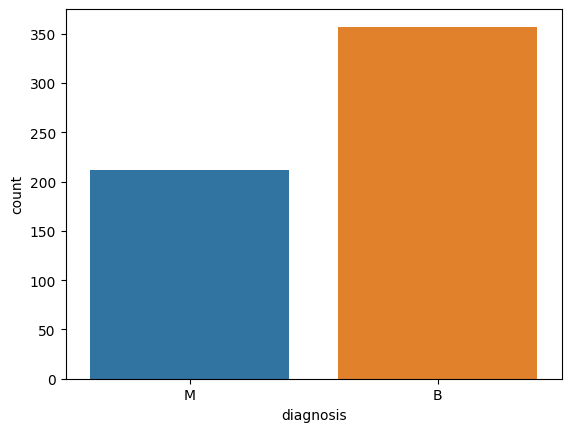

In [ ]:
sns.countplot(x='diagnosis',data=df);

In [ ]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)#I want to change the target value integer
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: >

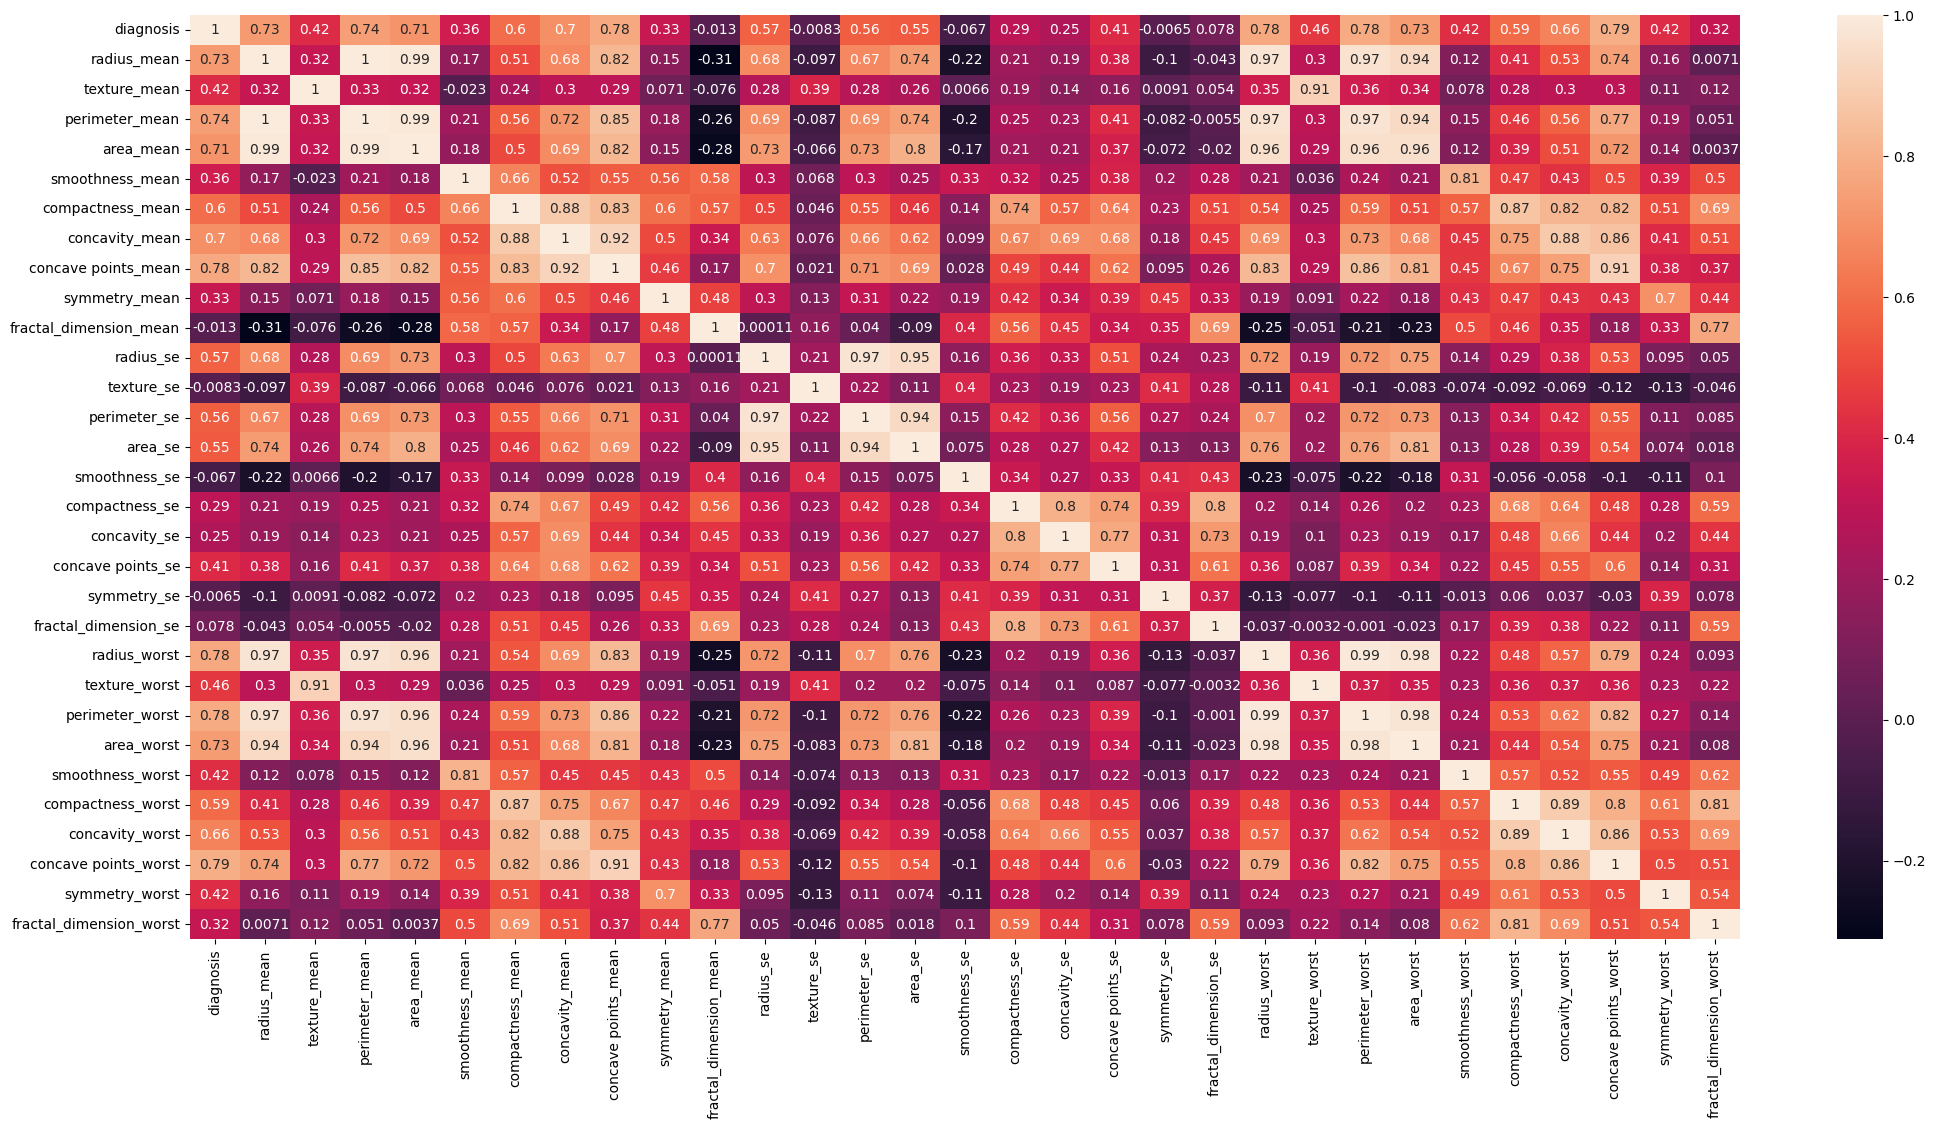

In [ ]:
plt.figure(figsize=(25,12))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df['diagnosis'].value_counts() #Malign(hastalıklı) means 1 and beign means(0)

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
corr_matrix = df.corr()

In cell 13, we found that some features are highly correlated or discorrelated with the diagnosis, so we will extract the scatter plot of these variables.

In [ ]:
high_corr_matrix = corr_matrix[abs(corr_matrix['diagnosis'])>= 0.7]
high_corr_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
radius_worst,0.776454,0.969539,0.352573,0.969476,0.962746,0.213120,0.535315,0.688236,0.830318,0.185728,...,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492
perimeter_worst,0.782914,0.965137,0.358040,0.970387,0.959120,0.238853,0.590210,0.729565,0.855923,0.219169,...,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957
area_worst,0.733825,0.941082,0.343546,0.941550,0.959213,0.206718,0.509604,0.675987,0.809630,0.177193,...,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647
concave points_worst,0.793566,0.744214,0.295316,0.771241,0.722017,0.503053,0.815573,0.861323,0.910155,0.430297,...,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114


In [ ]:
high_corr_list = high_corr_matrix.index.to_list()
high_corr_list

['diagnosis',
 'radius_mean',
 'perimeter_mean',
 'area_mean',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

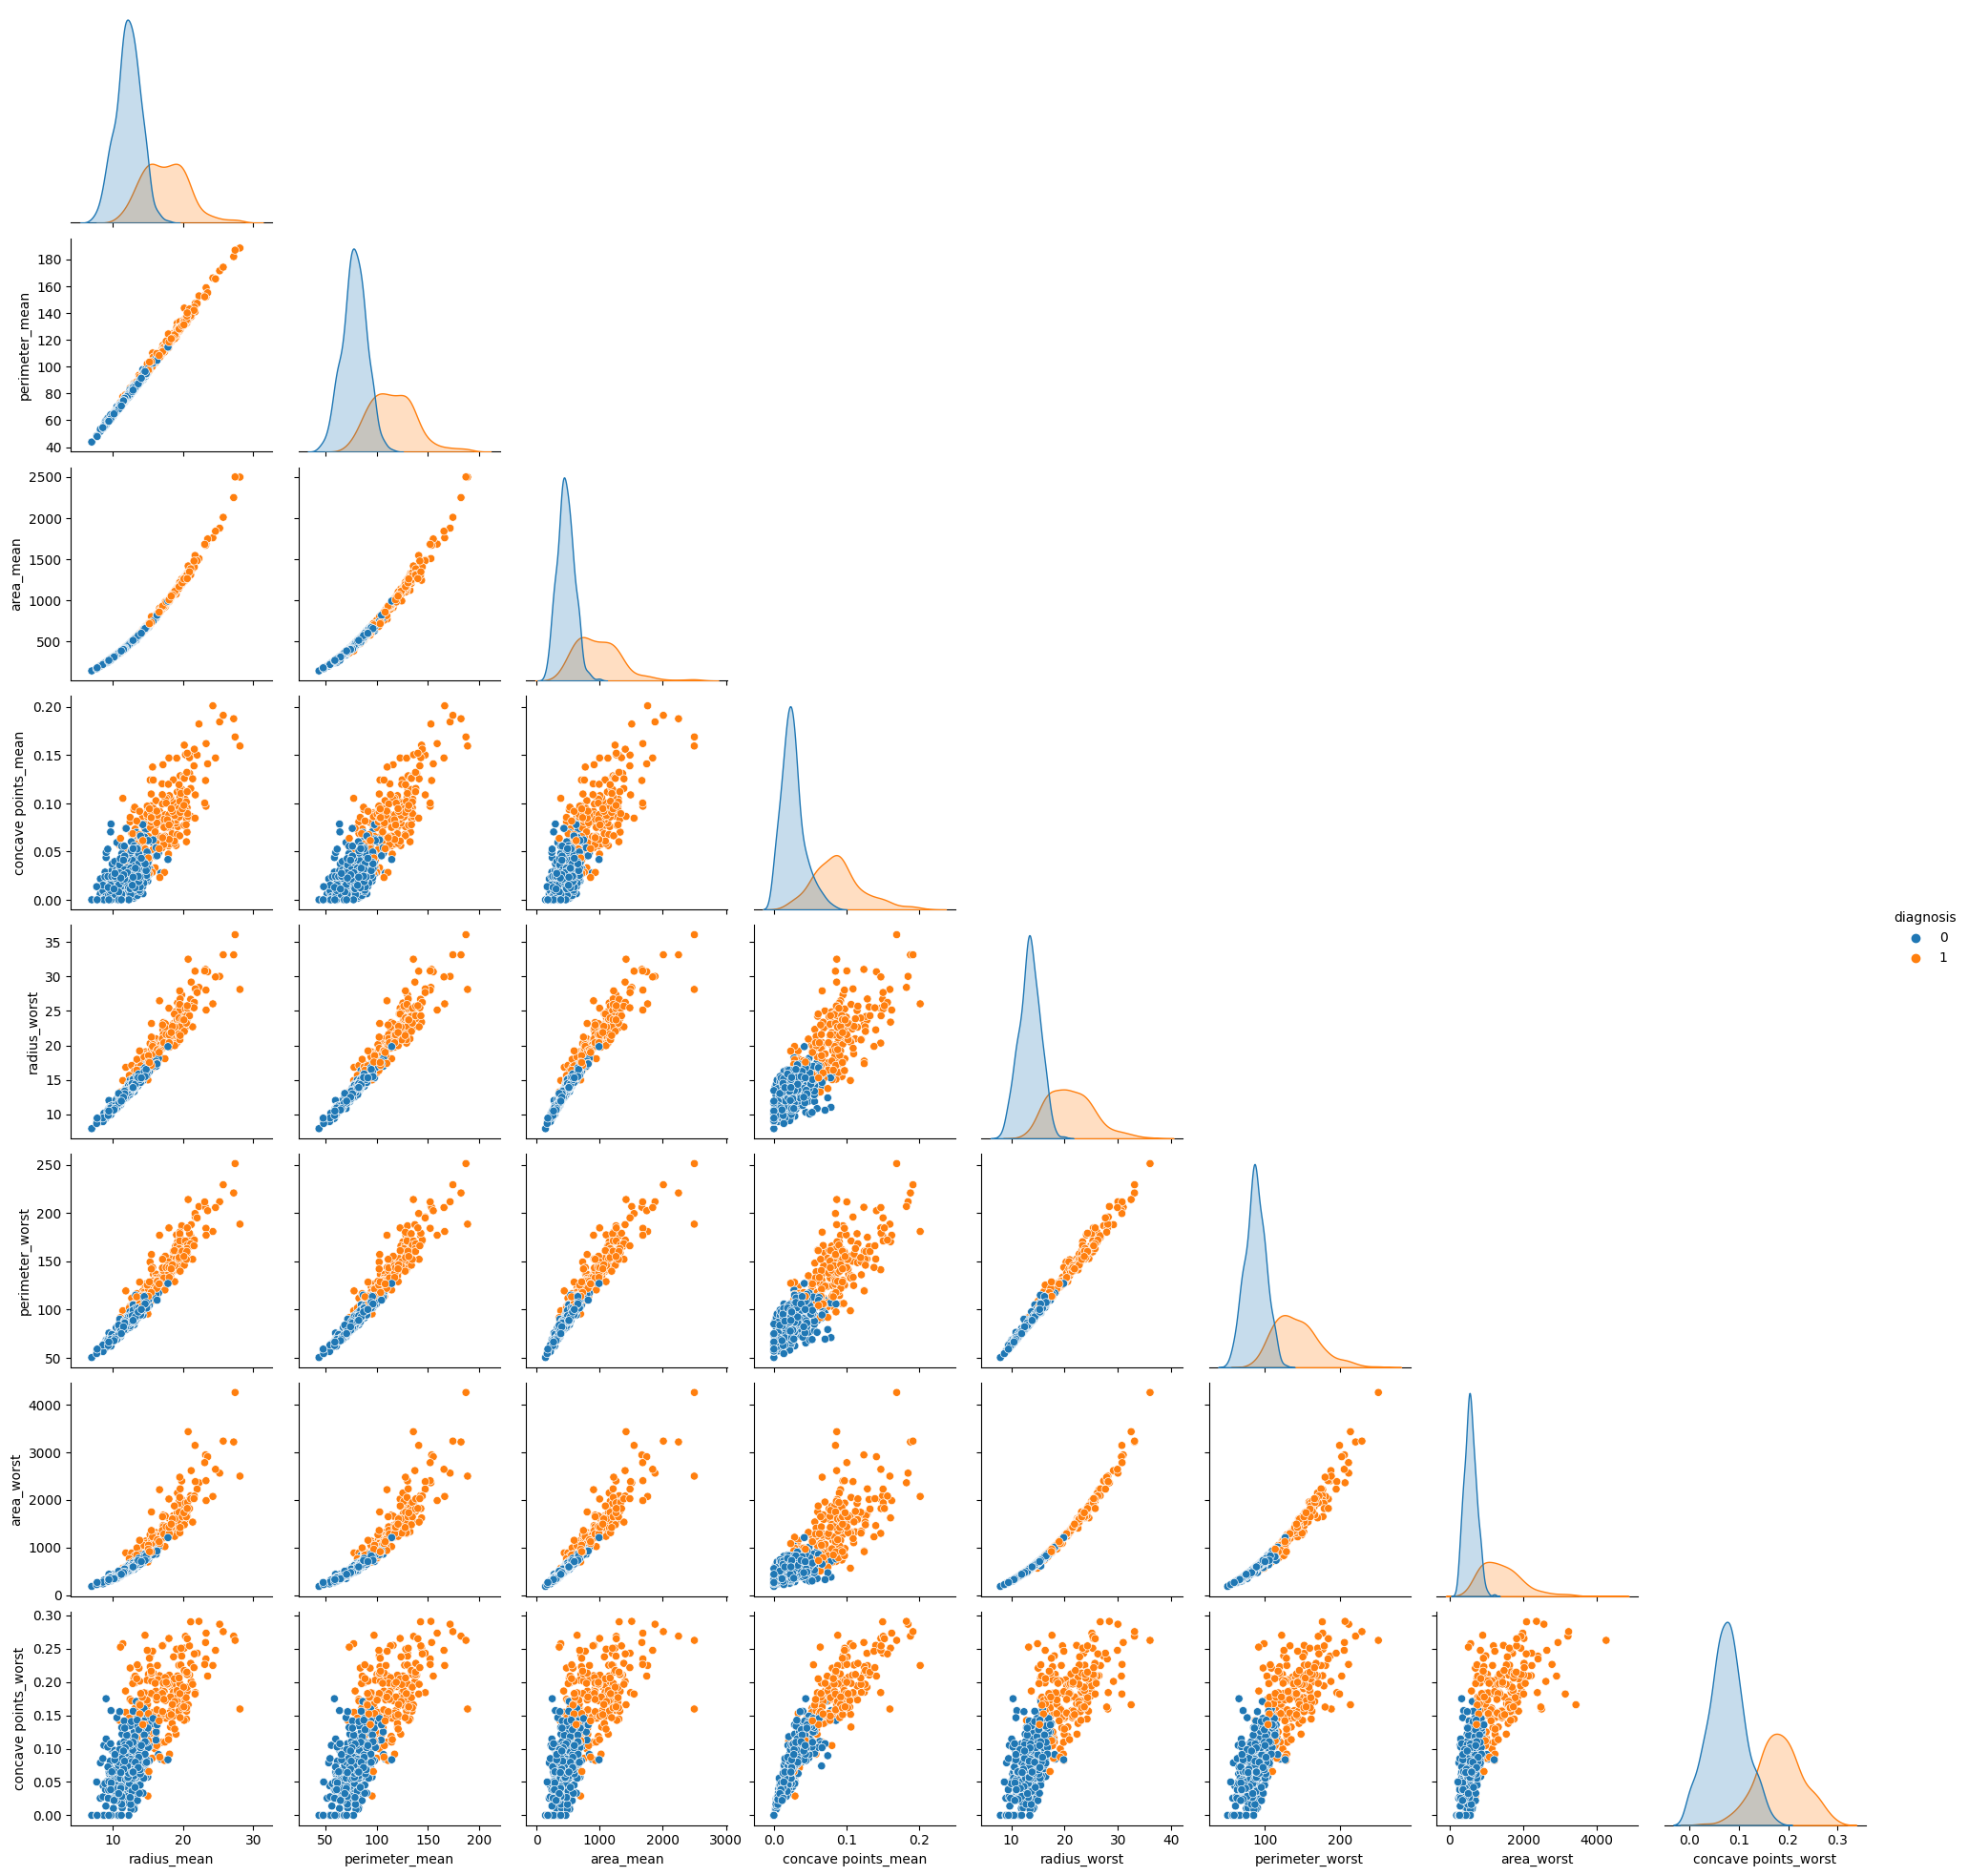

In [ ]:
sns.pairplot(df[high_corr_list],hue='diagnosis',corner=True)

In [ ]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Now continue with splitting the dataset

In [ ]:
X= df.drop('diagnosis',axis = 1)
y = df['diagnosis']

In [ ]:
X.values.shape,y.values.shape

((569, 30), (569,))

In [ ]:
type(X.values),type(y.values)

(numpy.ndarray, numpy.ndarray)

According to the feedback given in the first presentation we changed the split to train-75% validation-10% and test-15&

In [ ]:
def train_val_test_split(df, y_column, test_size=0.15, val_size=0.10):
    shuffled_indices = np.random.permutation(df.index)

    test_set_size = int(df.shape[0] * test_size)
    val_set_size = int(df.shape[0] * val_size)

    test_indices = shuffled_indices[:test_set_size]
    val_indices = shuffled_indices[test_set_size:test_set_size + val_set_size]
    train_indices = shuffled_indices[test_set_size + val_set_size:]

    train_df = df.iloc[train_indices]
    val_df = df.iloc[val_indices]
    test_df = df.iloc[test_indices]

    X_train = train_df.drop(columns=[y_column])
    y_train = train_df[y_column]
    X_val = val_df.drop(columns=[y_column])
    y_val = val_df[y_column]
    X_test = test_df.drop(columns=[y_column])
    y_test = test_df[y_column]

    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
X_train,X_val,X_test,y_train,y_val,y_test = train_val_test_split(df,y_column ='diagnosis')

In [ ]:
X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape

((428, 30), (56, 30), (85, 30), (428,), (56,), (85,))

In [ ]:
def standardize_data(X_train, X_val, X_test):
    mu = X_train.mean()
    sigma = X_train.std()

    X_train_s = (X_train - mu) / sigma
    X_val_s = (X_val - mu) / sigma
    X_test_s = (X_test - mu) / sigma

    return X_train_s, X_val_s, X_test_s

In [ ]:
def metrics(y_pred,y_test):
    tp, fp, tn, fn = 0, 0, 0, 0
    for i in range(len(y_test)):
        true, pred = y_test.iloc[i], y_pred[i]
        if true == 1 and pred == 1:
            tp += 1
        elif true == 0 and pred == 1:
            fp += 1
        elif true == 0 and pred == 0:
            tn += 1
        elif true == 1 and pred == 0:
            fn += 1
    if (tp + fp + tn + fn) != 0:
        accuracy = (tp + tn) / (tp + fp + tn + fn)
    else:
        accuracy = 0

    if (tp + fp) != 0:
        precision = tp / (tp + fp)
    else:
        precision = 0

    if (tp + fn) != 0:
        recall = tp / (tp + fn)
    else:
        recall = 0

    if (precision + recall) != 0:
        f1 = 2 * (precision * recall) / (precision + recall)
    else:
        f1 = 0

    conf_dict = {'true=1':[tp,fn],'true=0':[fp,tn]}
    conf_matrix = pd.DataFrame(data=conf_dict)
    conf_matrix.index = ['pred=1','pred=0']

    return accuracy,precision,recall,f1,conf_matrix

# MODEL1: LOGISTIC REGRESSION

In [ ]:
class LogisticRegression:
    def __init__(self,l_rate = 0.01, iterations = 100):
        self.l_rate = l_rate
        self.iterations = iterations
        self.w = None

    def logistic_function(self,x):
        # P(Y=1|X=Xk)
        return 1/(1+np.exp(-x))

    def fit_logistic(self,X,y):
        m,n = X.shape #m=row, n=column/feature
        self.w = np.zeros(n)

        #Do gradient descent algortihm to update weights
        for i in range(self.iterations):
            z = np.dot(X,self.w)
            pred = self.logistic_function(z)

            error = y - pred
            #use cross entropy loss to calculate gradient.
            gradient = np.dot(X.T,error)  #Sum of errors weighted by its features
            self.w = self.w + self.l_rate*gradient

    def predict_prob(self,X):
        z = np.dot(X,self.w)
        return self.logistic_function(z)

    def predict(self,X,threshold = 0.5):
        probs = self.predict_prob(X)
        predictions = []
        for prob in probs:
            if prob >= threshold:
                predictions.append(1)
            else:
                predictions.append(0)

        return np.array(predictions)

In [ ]:
def kfold_cv(df, k=5, l_rate=0.01, iterations=100):
    fold_size = len(df) // k
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    for fold in range(k):
        start = fold * fold_size
        if fold < k - 1:
            end = start + fold_size
        else:
            end = len(df)
        test_df = df.iloc[start:end]
        train_df = pd.concat([df.iloc[:start], df.iloc[end:]])

        X_train = train_df.drop('diagnosis', axis=1)
        y_train = train_df['diagnosis']
        X_test = test_df.drop('diagnosis', axis=1)
        y_test = test_df['diagnosis']

        X_train_s,X_val_s, X_test_s = standardize_data(X_train,X_val, X_test)

        logistic_model = LogisticRegression(l_rate=l_rate, iterations=iterations)
        logistic_model.fit_logistic(X_train_s, y_train)

        y_pred = logistic_model.predict(X_val_s)

        accuracy,precision,recall,f1,conf_matrix = metrics(y_pred,y_val)

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    print("Average Accuracy:", round(np.mean(accuracies),4))
    print("Average Precision:", round(np.mean(precisions),4))
    print("Average Recall:", round(np.mean(recalls),4))
    print("Average F1-Score:", round(np.mean(f1_scores),4))

kfold_cv(df)

Average Accuracy: 0.9679
Average Precision: 0.9727
Average Recall: 0.9455
Average F1-Score: 0.9586


Now test the same logistic regression model without cross validation

In [ ]:
X_train_s,X_val_s,X_test_s = standardize_data(X_train,X_val,X_test)

In [ ]:
start_time_log = datetime.datetime.now()
logistic_model_2 = LogisticRegression(l_rate=0.01,iterations=100)
logistic_model_2.fit_logistic(X_train_s,y_train)
end_time_log = datetime.datetime.now()
elapsed_time_log = end_time_log - start_time_log
print(f"Elapsed time to run logistic regression algorithm is: {elapsed_time_log.total_seconds()}")
y_pred_2 = logistic_model_2.predict(X_test_s)

Elapsed time to run logistic regression algorithm is: 0.058495


In [ ]:
accuracy,precision,recall,f1,conf_matrix = metrics(y_pred_2,y_test)
print("Accuracy:", round(accuracy,4))
print("Precision:", round(precision,4))
print("Recall:", round(recall,4))
print("F1-Score:", round(f1,4))
conf_matrix

Accuracy: 0.9647
Precision: 0.9583
Recall: 0.92
F1-Score: 0.9388


,true=1,true=0
pred=1,23,1
pred=0,2,59


# MODEL 2: MLP

In [ ]:
start_time_mlp = datetime.datetime.now()

In [ ]:
class MLP:
    def __init__(self, input_size=30, hidden_size=64):
        np.random.seed(38)
        self.w1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.w2 = np.random.randn(hidden_size, 1)
        self.b2 = np.zeros(1)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, x):
        self.z1 = np.dot(x, self.w1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2.squeeze()#removoes single dimensional entries (n,1) => (n,) matrix=>vector

    def backward(self, x, y, y_pred, learning_rate):

        y = np.array(y).reshape(-1, 1)#ensures true labels are numpy array (-1,1) auto calculates the dimension to be match up
        y_pred = y_pred.reshape(-1, 1)

        error1 = y_pred - y
        sig_deriv = self.sigmoid_derivative(y_pred)

        d_w2 = np.dot(self.a1.T, error1 * sig_deriv)#same as the logistic regression with multipication sig_deriv
        d_b2 = np.sum(error1 * sig_deriv, axis=0)

        error2 = np.dot(error1 * sig_deriv, self.w2.T) * self.sigmoid_derivative(self.a1)
        d_w1 = np.dot(x.T, error2)
        d_b1 = np.sum(error2, axis=0)

        self.w1 -= learning_rate * d_w1
        self.b1 -= learning_rate * d_b1
        self.w2 -= learning_rate * d_w2
        self.b2 -= learning_rate * d_b2

    def train(self, X_train, y_train, epochs, learning_rate):
        for epoch in range(epochs):
            y_pred = self.forward(X_train)
            self.backward(X_train, y_train, y_pred, learning_rate)

    def evaluate(self, X_val, y_val, threshold):
        y_pred = self.forward(X_val) > threshold
        accuracy, precision, recall, f1, conf_matrix = metrics(y_pred, y_val)
        return accuracy, precision, recall, f1, conf_matrix

model_mlp = MLP(input_size = 30, hidden_size=96)
model_mlp.train(X_train_s, y_train, epochs=100, learning_rate=0.01)
end_time_log = datetime.datetime.now()
elapsed_time_log = end_time_log - start_time_log
print(f"Elapsed time to run MLP algorithm is: {elapsed_time_log.total_seconds()}")
accuracy,precision,recall,f1,conf_matrix = model_mlp.evaluate(X_val_s, y_val,0.5)
print("Accuracy:", round(accuracy,4))
print("Precision:", round(precision,4))
print("Recall:", round(recall,4))
print("F1-Score:", round(f1,4))
conf_matrix

Elapsed time to run MLP algorithm is: 592.389529
Accuracy: 0.9821
Precision: 1.0
Recall: 0.9545
F1-Score: 0.9767


,true=1,true=0
pred=1,21,0
pred=0,1,34


Now hyperparameters are fixed so test the model with input size 30 and hidden size 64, 100 epoch

In [ ]:
start_time_mlp = datetime.datetime.now()
model_mlp = MLP(input_size = 30, hidden_size=96)
model_mlp.train(X_train_s, y_train, epochs=100, learning_rate=0.01)
end_time_mlp = datetime.datetime.now()
elapsed_time_mlp = end_time_mlp - start_time_mlp
print(f"Elapsed time to run multi-layer perceptron algorithm is: {elapsed_time_mlp.total_seconds()}")
accuracy,precision,recall,f1,conf_matrix = model_mlp.evaluate(X_test_s, y_test,0.5)
print("Accuracy:", round(accuracy,4))
print("Precision:", round(precision,4))
print("Recall:", round(recall,4))
print("F1-Score:", round(f1,4))
conf_matrix

Elapsed time to run multi-layer perceptron algorithm is: 0.233452
Accuracy: 0.9882
Precision: 1.0
Recall: 0.96
F1-Score: 0.9796


,true=1,true=0
pred=1,24,0
pred=0,1,60


# Model 3- Decision Tree

In [ ]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.root = None

    def entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        p = counts / counts.sum()
        entropy_sum = 0
        for prob in p:
            if prob > 0:
                entropy_sum -= prob * np.log2(prob)
        return entropy_sum

    def split(self, X, y, feature, threshold):
        left_indices = []
        right_indices = []

        for i in range(len(X)):
            if X[i, feature] <= threshold:
                left_indices.append(i)
            else:
                right_indices.append(i)
        left_y = y[left_indices]
        right_y = y[right_indices]

        return left_y, right_y


    def information_gain(self, y, left, right):
        ent_parent = self.entropy(y)
        ent_left = self.entropy(left)
        ent_right = self.entropy(right)
        w_left = len(left) / len(y)
        w_right = len(right) / len(y)
        ig = ent_parent - w_left * ent_left - w_right * ent_right
        return ig

    def best_split(self, X, y):
        best_feature_index = None
        best_threshold = None
        best_information_gain = -1

        for feature_index in range(X.shape[1]):
            unique_values = np.unique(X[:, feature_index])

            for value in unique_values:
                left_split, right_split = self.split(X, y, feature_index, value)

                if len(left_split) == 0 or len(right_split) == 0:
                    continue

                information_gain = self.information_gain(y, left_split, right_split)

                if information_gain > best_information_gain:
                    best_information_gain = information_gain
                    best_feature_index = feature_index
                    best_threshold = value

        return best_feature_index, best_threshold

    def build_tree(self, X, y, depth=0):
        if len(np.unique(y)) == 1 or depth == self.max_depth:
            return Node(value=np.unique(y)[0])

        best_feature, best_threshold = self.best_split(X, y)

        if best_feature is None:
            return Node(value=np.bincount(y).argmax())

        left_indices = []
        right_indices = []
        for i in range(len(X)):
            if X[i, best_feature] <= best_threshold:
                left_indices.append(i)
            else:
                right_indices.append(i)

        left_subtree = self.build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self.build_tree(X[right_indices], y[right_indices], depth + 1)
        return Node(feature=best_feature, threshold=best_threshold, left=left_subtree, right=right_subtree)


    def fit(self, X, y):
        self.root = self.build_tree(X, y)

    def predict_sample(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self.predict_sample(x, node.left)
        else:
            return self.predict_sample(x, node.right)

    def predict(self, X):
        predictions = []
        for sample in X:
            predicted_class = self.predict_sample(sample, self.root)
            predictions.append(predicted_class)
        return np.array(predictions)


In [ ]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
X_val_np = X_val.to_numpy()

model_dt = DecisionTree(max_depth=8)
model_dt.fit(X_train_np, y_train_np)

y_pred_dt = model_dt.predict(X_val_np)
accuracy, precision, recall, f1, conf_matrix = metrics(y_pred_dt, y_val)
print("Accuracy:", round(accuracy,4))
print("Precision:", round(precision,4))
print("Recall:", round(recall,4))
print("F1-Score:", round(f1,4))
conf_matrix


Accuracy: 0.9464
Precision: 0.9524
Recall: 0.9091
F1-Score: 0.9302


,true=1,true=0
pred=1,20,1
pred=0,2,33


Testing the model with chosen hyperparams


In [ ]:
np.random.seed(38)

In [ ]:
start_time_log = datetime.datetime.now()
model_dt_final = DecisionTree(max_depth=4)
model_dt_final.fit(X_train_np, y_train_np)
end_time_log = datetime.datetime.now()
elapsed_time_log = end_time_log - start_time_log
print(f"Elapsed time to run Decision Tree algorithm is: {elapsed_time_log.total_seconds()}")
y_pred_dt_final = model_dt_final.predict(X_test_np)
accuracy, precision, recall, f1, conf_matrix = metrics(y_pred_dt_final, y_test)
print("Accuracy:", round(accuracy,4))
print("Precision:", round(precision,4))
print("Recall:", round(recall,4))
print("F1-Score:", round(f1,4))
conf_matrix

Elapsed time to run Decision Tree algorithm is: 9.913804
Accuracy: 0.9294
Precision: 0.9524
Recall: 0.8
F1-Score: 0.8696


,true=1,true=0
pred=1,20,1
pred=0,5,59


# Model 4 - Random Forest

In [ ]:
class RandomForest:
    def __init__(self, n_trees=100, max_features=None, max_depth=None):
        np.random.seed(38)
        self.n_trees = n_trees
        self.max_features = max_features
        self.max_depth = max_depth
        self.trees = []

    def bootstrap_sample(self, X, y):#create multiple sample of orig dataset
        indices = np.random.randint(0, len(X), len(X))

        X_sample = X[indices]
        y_sample = y[indices]

        return X_sample, y_sample

    def feature_subset(self, X): #randonly selects subset of features
        if self.max_features is not None and self.max_features < X.shape[1]:
            selected_features = np.random.choice(X.shape[1], self.max_features, replace=False)
            X_subset = X[:, selected_features]
            return X_subset, selected_features

        else:
            selected_features = None
            X_subset = X
            return X_subset, selected_features

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            X_sample, y_sample = self.bootstrap_sample(X, y)
            X_sample, features = self.feature_subset(X_sample)
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append((tree, features))

    def majority_vote(self, predictions):
        majority_votes = np.round(predictions / self.n_trees).astype(int)
        return majority_votes

    def predict(self, X):
        predictions = np.zeros(len(X))
        for tree, features in self.trees:
            if features is not None:
                # Subset the features using the selected feature indices
                preds = tree.predict(X[:, features])
            else:
                preds = tree.predict(X)
            predictions += preds
        return self.majority_vote(predictions)



In [ ]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
start_time_log = datetime.datetime.now()
model_rf = RandomForest(n_trees = 4,max_features = 6,max_depth = 4)
model_rf.fit(X_train_np, y_train_np)
end_time_log = datetime.datetime.now()
elapsed_time_log = end_time_log - start_time_log
print(f"Elapsed time to run Random Forest algorithm is: {elapsed_time_log.total_seconds()}")
y_pred_rf = model_rf.predict(X_val_np)
accuracy, precision, recall, f1, conf_matrix = metrics(y_pred_rf, y_val)
print("Accuracy:", round(accuracy,4))
print("Precision:", round(precision,4))
print("Recall:", round(recall,4))
print("F1-Score:", round(f1,4))
conf_matrix

Elapsed time to run Random Forest algorithm is: 4.885522
Accuracy: 0.8929
Precision: 1.0
Recall: 0.7273
F1-Score: 0.8421


,true=1,true=0
pred=1,16,0
pred=0,6,34


Now test the model with the found hyperparameters above

In [ ]:
model_rf_final = RandomForest(n_trees = 5 ,max_features = 6,max_depth = 4)
model_rf_final.fit(X_train_np, y_train_np)

y_pred_rf_final = model_rf_final.predict(X_test_np)
accuracy, precision, recall, f1, conf_matrix = metrics(y_pred_rf_final, y_test)
print("Accuracy:", round(accuracy,4))
print("Precision:", round(precision,4))
print("Recall:", round(recall,4))
print("F1-Score:", round(f1,4))
conf_matrix

Accuracy: 0.9412
Precision: 1.0
Recall: 0.8
F1-Score: 0.8889


,true=1,true=0
pred=1,20,0
pred=0,5,60
